In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#파일 경로 설정
base_dir = '/content/gdrive/MyDrive/Penguin_ResizedImages_Sharpened'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# file_path = '/content/sample_data/Penguin_data/validation/.ipynb_checkpoints'

# if os.path.exists(file_path):
#   shutil.rmtree(file_path)
#   print("Folder deleted successfully")
# else:
#   print("File not found")

penguin_classes = ['adelie', 'chinstrap', 'emperor', 'galapagose', 'gentoo', 'little', 'macaroni', 'magellanic', 'rockhopper']

# train, validation, test directory dictionaries
# key = penguin, value = directory
train_penguin_dir = {}
validation_penguin_dir = {}
test_penguin_dir = {}
train_penguin_fnames = {}


for penguin in penguin_classes:
  train_penguin_dir[penguin] = os.path.join(train_dir, penguin);
  validation_penguin_dir[penguin] = os.path.join(validation_dir, penguin)
  test_penguin_dir[penguin] = os.path.join(test_dir, penguin)
  train_penguin_fnames[penguin] = os.listdir(train_penguin_dir[penguin])


for penguin in penguin_classes:
  print(f'Total training {penguin} images : ', len(os.listdir(train_penguin_dir[penguin])))
  print(f'Total validation {penguin} images : ', len(os.listdir(validation_penguin_dir[penguin])))
  print(f'Total test test {penguin} images : ', len(os.listdir(test_penguin_dir[penguin])))
  print('\n')



Total training adelie images :  135
Total validation adelie images :  35
Total test test adelie images :  35


Total training chinstrap images :  189
Total validation chinstrap images :  47
Total test test chinstrap images :  47


Total training emperor images :  122
Total validation emperor images :  37
Total test test emperor images :  31


Total training galapagose images :  153
Total validation galapagose images :  39
Total test test galapagose images :  41


Total training gentoo images :  133
Total validation gentoo images :  34
Total test test gentoo images :  34


Total training little images :  169
Total validation little images :  42
Total test test little images :  42


Total training macaroni images :  146
Total validation macaroni images :  37
Total test test macaroni images :  37


Total training magellanic images :  147
Total validation magellanic images :  37
Total test test magellanic images :  37


Total training rockhopper images :  136
Total validation rockhopper im

In [ ]:
#이미지 확인
nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_macaroni_pix = [os.path.join(train_macaroni_dir, fname) for fname in train_macaroni_fnames[pic_index-8:pic_index]]
next_magellanic_pix = [os.path.join(train_magellanic_dir, fname) for fname in train_magellanic_fnames[pic_index-8:pic_index]]





In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Augmentation 적용
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=25,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest'
                                    )

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    color_mode='rgb',
                                                    class_mode='sparse',
                                                    target_size=(128,128)
                                                    )

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=4,
                                                              color_mode='rgb',
                                                              class_mode='sparse',
                                                              target_size=(128,128)
                                                              )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  target_size=(128,128)
                                                  )

#Augmentation 적용 확인
# sample_img = mpimg.imread(next_macaroni_pix[1])
# plt.imshow(sample_img)
# plt.show()

# max_iter = 4
# cnt = 1
# sample_img2 = sample_img[np.newaxis, ...]

# plt.figure(figsize=(10,10))
# for img in train_datagen.flow(sample_img2):
#   plt.subplot(1,max_iter,cnt)
#   plt.imshow(image.array_to_img(img[0]))
#   if cnt == max_iter:
#     break
#   cnt+=1

train_generator.class_indices
train_generator

Found 1321 images belonging to 9 classes.
Found 334 images belonging to 9 classes.
Found 334 images belonging to 9 classes.


In [ ]:
#모델 구성

import tensorflow as tf

num_classes = len(penguin_classes)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)), ##
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes) # binary의 경우에는 'sigmoid' 사용
])
model.summary()

#모델 컴파일
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), #RMSprop(learning_rate=0.001)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss='binary_crossentropy'
              metrics=['accuracy']
              )
#모델 훈련
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=8,
                              epochs=200,
                              validation_steps=8,
                              verbose=2
                              )


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 64)      

<ipython-input-35-9fffdfbcfb2d>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/200
8/8 - 71s - loss: 2.3700 - accuracy: 0.1406 - val_loss: 2.2254 - val_accuracy: 0.0625 - 71s/epoch - 9s/step
Epoch 2/200
8/8 - 60s - loss: 2.1845 - accuracy: 0.1484 - val_loss: 2.1880 - val_accuracy: 0.0625 - 60s/epoch - 8s/step
Epoch 3/200
8/8 - 50s - loss: 2.1790 - accuracy: 0.1488 - val_loss: 2.2021 - val_accuracy: 0.0938 - 50s/epoch - 6s/step
Epoch 4/200
8/8 - 55s - loss: 2.1681 - accuracy: 0.1172 - val_loss: 2.1830 - val_accuracy: 0.1562 - 55s/epoch - 7s/step
Epoch 5/200
8/8 - 42s - loss: 2.1629 - accuracy: 0.1328 - val_loss: 2.1129 - val_accuracy: 0.2188 - 42s/epoch - 5s/step
Epoch 6/200
8/8 - 40s - loss: 2.1473 - accuracy: 0.1719 - val_loss: 2.1907 - val_accuracy: 0.1250 - 40s/epoch - 5s/step
Epoch 7/200
8/8 - 35s - loss: 2.0645 - accuracy: 0.1953 - val_loss: 2.3965 - val_accuracy: 0.1250 - 35s/epoch - 4s/step
Epoch 8/200
8/8 - 33s - loss: 2.1334 - accuracy: 0.1250 - val_loss: 2.1381 - val_accuracy: 0.0938 - 33s/epoch - 4s/step
Epoch 9/200
8/8 - 26s - loss: 2.1156 - a

In [ ]:
file_path = '/content/sample_data/Penguin_data/test/macaroni/.ipynb_checkpoints'

if os.path.exists(file_path):
  shutil.rmtree(file_path)
  print("Folder deleted successfully")
else:
  print("File not found")

In [ ]:
model.evaluate(train_generator)

83/83 [==============================] - 10s 114ms/step - loss: 0.8086 - accuracy: 0.7222


[0.8085974454879761, 0.722180187702179]

In [ ]:
model.evaluate(validation_generator)

84/84 [==============================] - 1s 12ms/step - loss: 1.9522 - accuracy: 0.5240


[1.952231764793396, 0.523952066898346]

In [ ]:
from tensorflow.keras.utils import print_summary

print_summary(model)

ImportError: ignored

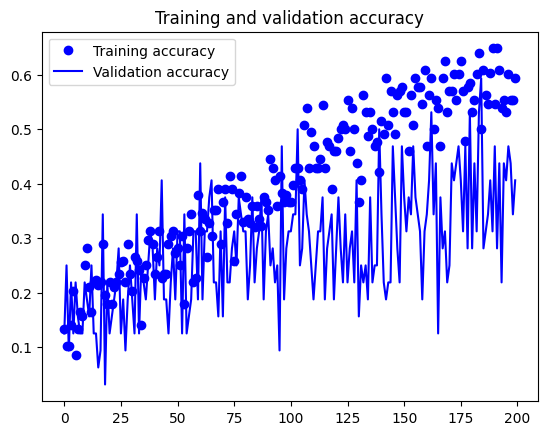

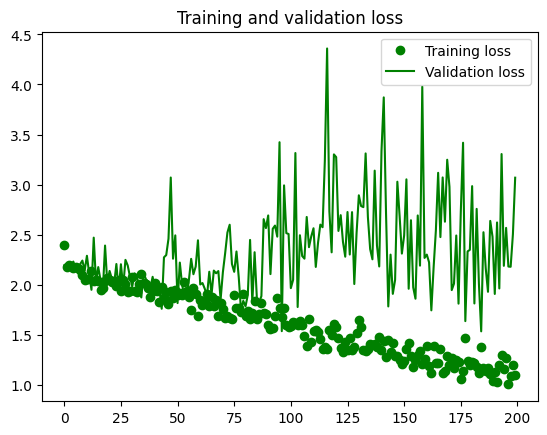

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import keras.utils as image

test_dir = '/content/gdrive/MyDrive/Penguin_ResizedImages_blur/test/'
test_macaroni_dir = os.path.join(test_dir, 'macaroni/')
test_macaroni_filenames = os.listdir(test_macaroni_dir)
test_macaroni_filenames

test_magellanic_dir = os.path.join(test_dir, 'magellanic/')
test_magellanic_filenames = os.listdir(test_magellanic_dir)
test_magellanic_filenames

test_adelie_dir = os.path.join(test_dir, 'adelie/')
test_adelie_filenames = os.listdir(test_adelie_dir)
test_adelie_filenames

test_chinstrap_dir = os.path.join(test_dir, 'chinstrap/')
test_chinstrap_filenames = os.listdir(test_chinstrap_dir)
test_chinstrap_filenames

test_emperor_dir = os.path.join(test_dir, 'emperor/')
test_emperor_filenames = os.listdir(test_emperor_dir)
test_emperor_filenames

test_galapagose_dir = os.path.join(test_dir, 'galapagose/')
test_galapagose_filenames = os.listdir(test_galapagose_dir)
test_galapagose_filenames

test_gentoo_dir = os.path.join(test_dir, 'gentoo/')
test_gentoo_filenames = os.listdir(test_gentoo_dir)
test_gentoo_filenames

test_little_dir = os.path.join(test_dir, 'little/')
test_little_filenames = os.listdir(test_little_dir)
test_little_filenames

test_rockhopper_dir = os.path.join(test_dir, 'rockhopper/')
test_rockhopper_filenames = os.listdir(test_rockhopper_dir)
test_rockhopper_filenames

dic_penguin_filenames={}
dic_penguin_filenames['macaroni'] = test_macaroni_filenames
dic_penguin_filenames['magellanic'] = test_magellanic_filenames
dic_penguin_filenames['adelie'] = test_adelie_filenames
dic_penguin_filenames['chinstrap'] = test_chinstrap_filenames
dic_penguin_filenames['emperor'] = test_emperor_filenames
dic_penguin_filenames['galapagose'] = test_galapagose_filenames
dic_penguin_filenames['gentoo'] = test_gentoo_filenames
dic_penguin_filenames['little'] = test_little_filenames
dic_penguin_filenames['rockhopper'] = test_rockhopper_filenames


class_labels=['adelie', 'chinstrap', 'emperor', 'galapagose', 'gentoo', 'little', 'macaroni', 'magellanic', 'rockhopper']


for penguin, filenames in dic_penguin_filenames.items():
  fig = plt.figure(figsize=(80,50))
  rows, cols = 4, 16
  for i, fn in enumerate(filenames):
    path = test_dir + penguin + '/' + fn
    test_img = image.load_img(path, color_mode='rgb', target_size=(128,128), interpolation='nearest')
    x = image.img_to_array(test_img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    score = tf.nn.softmax(classes[0])
    prediction_label = class_labels[np.argmax(score)]

    fig.add_subplot(rows, cols, i+1)
    if prediction_label=='adelie':
      plt.title(fn + " is adelie")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='chinstrap':
      plt.title(fn + " is chinstrap")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='emperor':
      plt.title(fn + " is emperor")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='galapagose':
      plt.title(fn + " is galapagose")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='gentoo':
      plt.title(fn + " is gentoo")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='little':
      plt.title(fn + " is little")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='macaroni':
      plt.title(fn + " is macaroni")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='magellanic':
      plt.title(fn + " is magellanic")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    elif prediction_label=='rockhopper':
      plt.title(fn + " is rockhopper")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

    else:
      plt.title(fn + " is nothing")
      plt.axis('off')
      plt.imshow(test_img, cmap='brg')

  plt.show()
